In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('tempgas.csv')

In [3]:
data.head(10)

,Temp,conc_gas,Target
0,24.71,356.0,0
1,82.81,279.0,1
2,24.71,279.0,0
3,104.79,279.0,1
4,104.79,158.0,1
5,24.71,158.0,0
6,24.71,332.0,0
7,24.71,158.0,0
8,24.71,158.0,0
9,24.71,322.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Temp      505 non-null    float64
 1   conc_gas  505 non-null    float64
 2   Target    505 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 12.0 KB


In [5]:
data.shape


(505, 3)

In [6]:
data.describe()

,Temp,conc_gas,Target
count,505.000000,505.000000,505.000000
mean,63.340396,164.313069,0.415842
std,26.442040,85.269236,0.493355
min,10.000000,12.000000,0.000000
25%,41.000000,98.000000,0.000000
50%,64.500000,159.000000,0.000000
75%,85.690000,195.000000,1.000000
max,186.400000,456.000000,1.000000


In [7]:
data.isnull().sum()

Temp        0
conc_gas    0
Target      0
dtype: int64

array([[<AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'conc_gas'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>]],
      dtype=object)

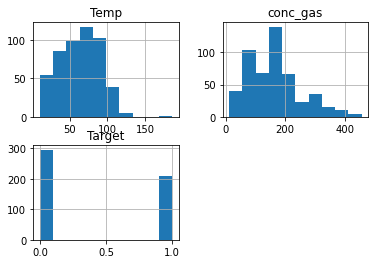

In [8]:
data.hist()

Normalation

In [9]:
data.var()

Temp         699.181457
conc_gas    7270.842527
Target         0.243399
dtype: float64

In [9]:
data['Temp']=np.log(data['Temp'])
data['conc_gas']=np.log(data['conc_gas'])
data.var()

Temp        0.254660
conc_gas    0.341901
Target      0.243399
dtype: float64

In [10]:
data.isnull().sum()

Temp        0
conc_gas    0
Target      0
dtype: int64

In [11]:
x = data.drop('Target',axis=1)
y=data['Target']

In [12]:
#spliting the data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Temp      505 non-null    float64
 1   conc_gas  505 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


Logistic regression

In [14]:
accuracies={}
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acc=accuracy_score(y_test,y_pred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 88.95184135977338 %
Testing accuracy score of the model is: 92.76315789473685 %


In [15]:
import pickle
# pickle the trained model to a file
with open('lr.pkl', 'wb') as f:
    pickle.dump(lr, f)
    
# load the pickled model from file
with open('lr.pkl', 'rb') as f:
    model = pickle.load(f)

# use the loaded model to make predictions on new data
X_new = [[80,20]]  # assuming X_new is a numpy array of shape (n_samples, 3)
y_new = model.predict(X_new)
print(y_new)

[1]


F:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


KNearestNeighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train,y_train)

y_pred1 = knn.predict(x_test)

acc1=accuracy_score(y_test,y_pred1)
accuracies['KNN']=acc1*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Training accuracy score of the model is: 94.90084985835693 %
Testing accuracy score of the model is: 94.07894736842105 %


In [17]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred1))

print("Classification Report",classification_report(y_test,y_pred1))

Confusion matrix of the model [[84  4]
 [ 5 59]]
Classification Report               precision    recall  f1-score   support

           0       0.94      0.95      0.95        88
           1       0.94      0.92      0.93        64

    accuracy                           0.94       152
   macro avg       0.94      0.94      0.94       152
weighted avg       0.94      0.94      0.94       152



In [19]:
# pickle the trained model to a file
with open('knn_f.pkl', 'wb') as f:
    pickle.dump(knn, f)
    
# load the pickled model from file
with open('knn_f.pkl', 'rb') as f:
    model = pickle.load(f)

# use the loaded model to make predictions on new data
X_new = [[20,120]]  # assuming X_new is a numpy array of shape (n_samples, 3)
y_new = model.predict(X_new)
print(y_new)

[1]


F:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [20]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1, random_state=42)
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['SVM']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 88.38526912181302 %
Testing accuracy score of the model is: 92.10526315789474 %


In [21]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred2))

print("Classification Report",classification_report(y_test,y_pred2))

Confusion matrix of the model [[84  4]
 [ 8 56]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.95      0.93        88
           1       0.93      0.88      0.90        64

    accuracy                           0.92       152
   macro avg       0.92      0.91      0.92       152
weighted avg       0.92      0.92      0.92       152



In [22]:
# pickle the trained model to a file
with open('svm.pkl', 'wb') as f:
    pickle.dump(svc, f)
    
# load the pickled model from file
with open('svm.pkl', 'rb') as f:
    model = pickle.load(f)

# use the loaded model to make predictions on new data
X_new = [[60,190]]  # assuming X_new is a numpy array of shape (n_samples, 3)
y_new = model.predict(X_new)
print(y_new)

[1]


F:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)

acc3=accuracy_score(y_test,y_pred3)
accuracies['DT']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 99.71671388101983 %
Testing accuracy score of the model is: 88.81578947368422 %


In [24]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred3))

print("Classification Report",classification_report(y_test,y_pred3))

Confusion matrix of the model [[82  6]
 [11 53]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.93      0.91        88
           1       0.90      0.83      0.86        64

    accuracy                           0.89       152
   macro avg       0.89      0.88      0.88       152
weighted avg       0.89      0.89      0.89       152



In [26]:
# pickle the trained model to a file
with open('dtc.pkl', 'wb') as f:
    pickle.dump(dtc, f)
    
# load the pickled model from file
with open('dtc.pkl', 'rb') as f:
    model = pickle.load(f)

# use the loaded model to make predictions on new data
X_new = [[55,120]]  # assuming X_new is a numpy array of shape (n_samples, 3)
y_new = model.predict(X_new)
print(y_new)

[1]


F:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 180)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)

acc5=accuracy_score(y_test,y_pred5)
accuracies['RF']=acc5*100

print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

Training accuracy score of the model is: 97.45042492917847 %
Testing accuracy score of the model is: 92.76315789473685 %


In [28]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred5))

print("Classification Report",classification_report(y_test,y_pred5))

Confusion matrix of the model [[85  3]
 [ 8 56]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.97      0.94        88
           1       0.95      0.88      0.91        64

    accuracy                           0.93       152
   macro avg       0.93      0.92      0.92       152
weighted avg       0.93      0.93      0.93       152



In [30]:
# pickle the trained model to a file
with open('rfc.pkl', 'wb') as f:
    pickle.dump(rfc, f)
    
# load the pickled model from file
with open('rfc.pkl', 'rb') as f:
    model = pickle.load(f)

# use the loaded model to make predictions on new data
X_new = [[20,120]]  # assuming X_new is a numpy array of shape (n_samples, 3)
y_new = model.predict(X_new)
print(y_new)

[1]


F:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)
gbc.fit(x_train, y_train)

y_pred6 = gbc.predict(x_test)

acc6 = accuracy_score(y_test,y_pred6)
accuracies['GradientBoosting']=acc6*100

print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")

Training accuracy score of the model is: 99.71671388101983 %
Testing accuracy score of the model is: 93.42105263157895 %


In [32]:
# pickle the trained model to a file
with open('gt.pkl', 'wb') as f:
    pickle.dump(gbc, f)
    
# load the pickled model from file
with open('gt.pkl', 'rb') as f:
    model = pickle.load(f)

# use the loaded model to make predictions on new data
X_new = [[60,160]]  # assuming X_new is a numpy array of shape (n_samples, 3)
y_new = model.predict(X_new)
print(y_new)

[1]


F:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [37]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM',  'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Score': [acc, acc1,acc2,acc3,acc5, acc6]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,KNN,0.947368
4,Random Forest,0.934211
5,Gradient Boosting,0.934211
3,Decision Tree,0.888158
0,Logistic Regression,0.855263
2,SVM,0.855263


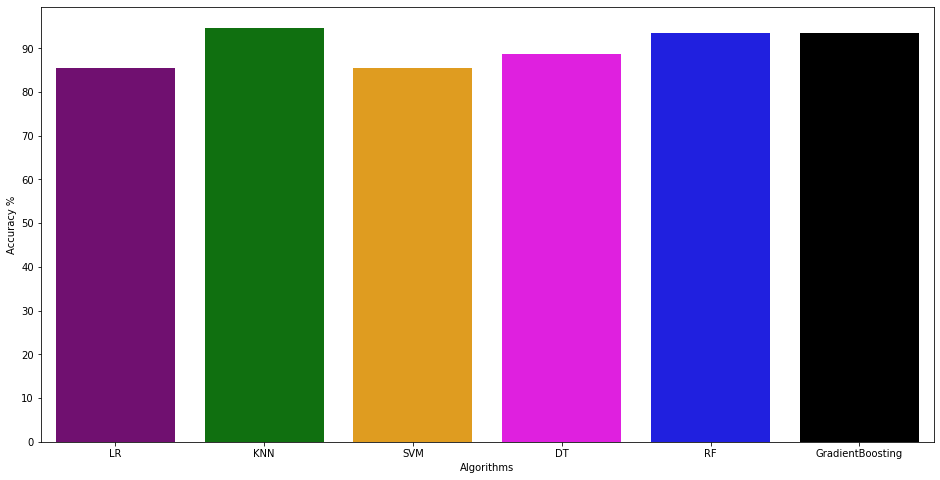

In [38]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

# sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()